## BBM409 ASSIGNMENT 1

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data [1]. Maximum Likelihood Estimation requires that the data are sampled from a multivariate normal distribution [2]. 

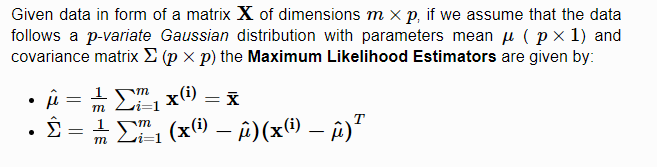

This assignment consists of 3 steps explained below.

Note: Don't forget to add comments in your codes.

[1]: https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#:~:text=In%20statistics%2C%20maximum%20likelihood%20estimation,observed%20data%20is%20most%20probable.

[2]: https://online.stat.psu.edu/stat505/lesson/12/12.7

**Step 1 :** You are provided two CSV files that contains samples derived from two bivariate Gaussian distributions separately; Class1.csv corresponds to $w_{1}$ class distribution, Class2.csv to $w_{2}$.  Estimate the parameters of these distributions using the max-likelihood estimates (given above) on the given data samples for both classes. (10 points) 

Write your codes in the cells shared below.

In [4]:
import numpy as np
from pandas import read_csv

"""Function to read csv files and do the main work"""
def estimateParams():
    class1 = read_csv("data/Class1.csv")
    class2 = read_csv("data/Class2.csv")

    class1Array = np.array(class1)
    class2Array = np.array(class2)


    """Function to find the means of 2 separate features. Simply add all and divide by the number of elements"""
    def findMeans(arr):
        means = []
        for i in arr:
            mean = 0
            ct = 0
            first = True
            for j in i:
                if first:
                    first = False
                    continue
                mean += j
                ct += 1
            mean /= ct
            means.append(mean)
        return means

    means1 = findMeans(class1Array)
    means1 = np.array([[means1[0]],
                       [means1[1]]])

    print("Means of the first class:\n", means1)
    means2 = findMeans(class2Array)
    means2 = np.array([[means2[0]],
                       [means2[1]]])

    print("Means of the second class:\n", means2)


    """Function to find covariance matrices"""
    def findCovMatrices(arr, mean):
        covMat = np.zeros(shape=(2, 2))
        m = len(arr[0]) - 1  # We need to divide by m at the end, but we ignore the first column so...

        for j in range(1, len(arr[0])):
            # Create vector x
            elem1 = arr[0][j]
            elem2 = arr[1][j]

            x = np.array([[elem1],
                         [elem2]])

            # Subtract mean from x
            sub1 = np.subtract(x, mean)
            sub1 = np.array(sub1)

            # Subtract the mean from x and get the transpose of it
            sub2 = np.transpose(sub1)

            # Multiply these two
            mult = np.multiply(sub1, sub2)
            covMat += mult

        # Return
        return np.divide(covMat, m)

    covMat1 = findCovMatrices(class1Array, means1)
    covMat2 = findCovMatrices(class2Array, means2)

    print("Covariance Matrix of the first class:\n", covMat1)
    print("Covariance Matrix of the second class\n", covMat2)


if __name__ == '__main__':
    estimateParams()


Means of the first class:
 [[-1.60184933]
 [-1.74017087]]
Means of the second class:
 [[5.03279004]
 [3.00261806]]
Covariance Matrix of the first class:
 [[ 1.57171937 -0.52997235]
 [-0.52997235  2.99853667]]
Covariance Matrix of the second class
 [[1.62784462 0.51664892]
 [0.51664892 0.76483477]]


**Step 2 :** Write a program to find the decision boundaries between the two distributions for $w_{1}$ and $w_{2}$; and plot them. (50 points)

Please explain briefly, why the decision boundary is in the form that you obtained? 

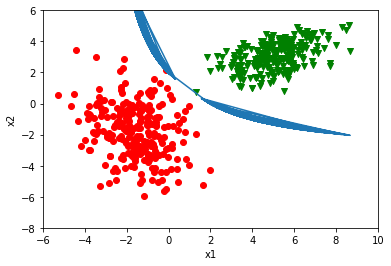

In [10]:
import numpy as np
from scipy import linalg
from pandas import read_csv
from matplotlib import pyplot as plt
import scipy.optimize
from functools import partial

"""Function to find the boundries between two distributions w1 and w2"""


def findBoundries():
    """First class"""
    cov1 = np.array([
        [1.57171937, -0.52997235],
        [-0.52997235, 2.99853667]
    ])

    means1 = np.array([[-1.60184933],
                       [-1.74017087]])

    cov1I = linalg.inv(cov1)  # cov1 in inversi
    cov1Det = linalg.det(cov1)

    W1 = -0.5 * cov1I
    w1 = np.matmul(cov1I, means1)

    w10first = -0.5 * np.matmul(np.matmul(np.transpose(means1), cov1I), means1)
    w10sec = 0.5 * np.log(cov1Det)
    w10third = np.log(0.5)

    w10 = w10first - w10sec + w10third

    """Second class"""
    cov2 = np.array([
        [1.62784462, 0.51664892],
        [0.51664892, 0.76483477]
    ])

    means2 = np.array([[5.03279004],
                       [3.00261806]])

    cov2I = linalg.inv(cov2)  # cov2 nin inversi
    cov2Det = linalg.det(cov2)

    W2 = -0.5 * cov2I
    w2 = np.matmul(cov2I, means2)

    w20first = -0.5 * np.matmul(np.matmul(np.transpose(means2), cov2I), means2)
    w20sec = 0.5 * np.log(cov2Det)
    w20third = np.log(0.5)

    w20 = w20first - w20sec + w20third

    def g1(x):
        return np.matmul(np.matmul(np.transpose(x), W1), x) + np.matmul(np.transpose(w1), x) + w10

    def g2(x):
        return np.matmul(np.matmul(np.transpose(x), W2), x) + np.matmul(np.transpose(w2), x) + w20

    """ x is a (2,1) vector. This function defines g1(x) - g2(x) """

    def g1_g2(x1, x2):
        x = np.array([
            [x1], [x2]
        ])
        return g1(x) - g2(x)


    """Get x and y points from equations"""
    x_0 = []
    y_0 = []

    x_p = []
    x_p2 = []


    class1 = read_csv("data/Class1.csv")
    class2 = read_csv("data/Class2.csv")

    class1Array = np.array(class1)
    class2Array = np.array(class2)

    """Function to create points"""

    def createPoints(arr):
        for j in range(1, len(arr[0])):
            # Create vector x
            elem1 = arr[0][j]
            elem2 = arr[1][j]

            x = np.array([[elem1],
                          [elem2]])

            x_0.append(x[0])
            y_0.append(x[1])

            x_p.append(x[0][0])
            x_p.append(x[1][0])

            x_p2.append(x[0][0])
            x_p2.append(x[1][0])

    createPoints(class1Array)
    plt.scatter(x_0, y_0, color="red")

    x_0 = []
    y_0 = []

    createPoints(class2Array)
    plt.scatter(x_0, y_0, color="green", marker="v")

    """Plotting the curve"""
    x_window = -6, 10
    y_window = -8, 6

    xs = []
    ys = []

    ct = 0


    for x1 in x_p:
        try:
            x2 = scipy.optimize.brentq(partial(g1_g2, x1), *y_window)

        except ValueError:
            # We should not be able to find a solution in this window.
            ct += 1
            pass
        else:
            xs.append(x1)
            ys.append(x2)

    for x1 in x_p2:
        try:
            x2 = scipy.optimize.brentq(partial(g1_g2, x1), *y_window)

        except ValueError:
            # We should not be able to find a solution in this window.
            ct += 1
            pass
        else:
            xs.append(x2)
            ys.append(x1)


    plt.plot(xs, ys)

    # Add labels
    plt.xlabel("x1")
    plt.ylabel("x2")

    # Add limits
    plt.xlim(*x_window)
    plt.ylim(*y_window)
    plt.show()


if __name__ == "__main__":
    findBoundries()


Red circles are indicating data from class1 and green triangles are indicating data from class2. I should to seperate these classes best way and in our case it's possible to seperate them by a curve. I used Case 3 because covariance matrices are different from each other. I implemented g1(x) = g2(x) and plotted it (blue curve).

**Step 3 :** You are provided a set of test samples in another CSV file. For each sample in that file, assign the given test samples to the appropriate classes according to the Bayesian Minimum Error-Rate principle. (40 points)

Provide the classification results in tabular form; each row contains the data in the form: ($x_{i_1}$, $x_{i_2}$, $w_{i}$), where $x_{i_1}$ and $x_{i_2}$ represents the value of the first and the second features, respectively; $w_{i}$ represents the assigned class index, i.e. 1 or 2. 

Plot your classification result. Make sure that all samples are depicted in one plot embedded on the computed 
densities with a distinguished color.

Use following prior probabilities: 

Case 1: P($w_{1}$) = P($w_{2}$) = 0.5

Case 2: P($w_{1}$) = 0.8, P($w_{2}$) = 0.2


Case 1 Results:
x11: -1.977627783078261 x12: 0.9107956712998084 w: 1
x11: -2.4215487733177583 x12: -0.6841361622437165 w: 1
x11: -2.4000296133743064 x12: -0.920662978276167 w: 1
x11: 2.8078167761802906 x12: -3.3960098668682406 w: 1
x11: -2.937309816208732 x12: -1.1412455501465444 w: 1
x11: -1.5060700888724217 x12: -1.7101884257677435 w: 1
x11: -1.3218990920562743 x12: -2.1056492289249142 w: 1
x11: 1.134877066714949 x12: -2.9813634133026072 w: 1
x11: -5.279607641622226 x12: -1.693543115695208 w: 1
x11: -3.4217946499076857 x12: -2.486450634473845 w: 1
x11: 0.2756155941613747 x12: -1.5791985921536045 w: 1
x11: -2.5642429214678586 x12: -0.7974727904072698 w: 1
x11: -3.567021231703035 x12: -2.4526634124632976 w: 1
x11: -2.717887405384828 x12: -6.48743017095369 w: 1
x11: -0.0875428421912376 x12: -5.361168251434346 w: 1
x11: 0.7082695715823428 x12: -2.0667771921337046 w: 1
x11: -2.5031377483814667 x12: 0.5227867481573281 w: 1
x11: -0.4614530965977574 x12: -1.9829022217164411 w: 1
x11: -1.2218

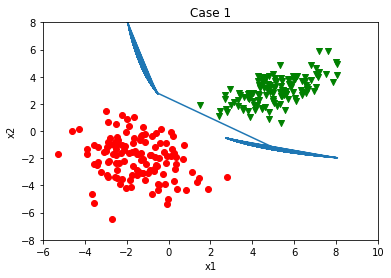

Case 2 Results:
x21: -1.977627783078261 x22: 0.9107956712998084 w: 1.0
x21: -2.4215487733177583 x22: -0.6841361622437165 w: 1.0
x21: -2.4000296133743064 x22: -0.920662978276167 w: 1.0
x21: 2.8078167761802906 x22: -3.3960098668682406 w: 1.0
x21: -2.937309816208732 x22: -1.1412455501465444 w: 1.0
x21: -1.5060700888724217 x22: -1.7101884257677435 w: 1.0
x21: -1.3218990920562743 x22: -2.1056492289249142 w: 1.0
x21: 1.134877066714949 x22: -2.9813634133026072 w: 1.0
x21: -5.279607641622226 x22: -1.693543115695208 w: 1.0
x21: -3.4217946499076857 x22: -2.486450634473845 w: 1.0
x21: 0.2756155941613747 x22: -1.5791985921536045 w: 1.0
x21: -2.5642429214678586 x22: -0.7974727904072698 w: 1.0
x21: -3.567021231703035 x22: -2.4526634124632976 w: 1.0
x21: -2.717887405384828 x22: -6.48743017095369 w: 1.0
x21: -0.0875428421912376 x22: -5.361168251434346 w: 1.0
x21: 0.7082695715823428 x22: -2.0667771921337046 w: 1.0
x21: -2.5031377483814667 x22: 0.5227867481573281 w: 1.0
x21: -0.4614530965977574 x22: -1.

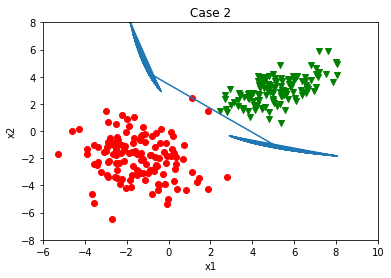

In [13]:
import numpy as np
from scipy import linalg
from pandas import read_csv
from matplotlib import pyplot as plt
import scipy.optimize
from functools import partial

def classify(case):
    """First class"""
    dataPoints = []
    curvePoints = []

    if case == 1:
        Px = 0.5
        print("Case 1 Results:")
    else:
        Px = 0.8
        print("Case 2 Results:")

    cov1 = np.array([
        [1.57171937, -0.52997235],
        [-0.52997235, 2.99853667]
    ])

    means1 = np.array([[-1.60184933],
                       [-1.74017087]])

    cov1I = linalg.inv(cov1)  # cov1 in inversi
    cov1Det = linalg.det(cov1)

    W1 = -0.5 * cov1I
    w1 = np.matmul(cov1I, means1)

    w10first = -0.5 * np.matmul(np.matmul(np.transpose(means1), cov1I), means1)
    w10sec = 0.5 * np.log(cov1Det)
    w10third = np.log(Px)

    w10 = w10first - w10sec + w10third

    """Second class"""
    cov2 = np.array([
        [1.62784462, 0.51664892],
        [0.51664892, 0.76483477]
    ])

    means2 = np.array([[5.03279004],
                       [3.00261806]])

    cov2I = linalg.inv(cov2)  # cov2 nin inversi
    cov2Det = linalg.det(cov2)

    W2 = -0.5 * cov2I
    w2 = np.matmul(cov2I, means2)

    w20first = -0.5 * np.matmul(np.matmul(np.transpose(means2), cov2I), means2)
    w20sec = 0.5 * np.log(cov2Det)
    w20third = np.log(1 - Px)

    w20 = w20first - w20sec + w20third

    def g1(x):
        return np.matmul(np.matmul(np.transpose(x), W1), x) + np.matmul(np.transpose(w1), x) + w10

    def g2(x):
        return np.matmul(np.matmul(np.transpose(x), W2), x) + np.matmul(np.transpose(w2), x) + w20

    """ x is a (2,1) vector. This function defines g1(x) - g2(x) """

    def g1_g2(x1, x2):
        x = np.array([
            [x1], [x2]
        ])
        return g1(x) - g2(x)



    testSamples = read_csv("data/test.csv")
    testSamplesArray = np.array(testSamples)

    x_p = []
    x_p2 = []

    x_0 = []
    y_0 = []

    x_1 = []
    y_1 = []


    for j in range(1, len(testSamplesArray[0])):
        # Create vector x which has 3 elements: x1, x2 and wi=-1 (default value). Class w will be assigned later.

        elem1 = testSamplesArray[0][j]
        elem2 = testSamplesArray[1][j]

        if case == 1:
            if j <= 125:
                w = 1

                x_0.append(elem1)
                y_0.append(elem2)

            else:
                w = 2
                x_1.append(elem1)
                y_1.append(elem2)

            x = np.array([[elem1],
                          [elem2],
                          [w]])
            print("x11:", x[0][0], "x12:", x[1][0], "w:", int(x[2][0]))

        elif case == 2:
            if j <= 125:
                w = 1

                x_0.append(elem1)
                y_0.append(elem2)

            else:
                w = 2
                x_1.append(elem1)
                y_1.append(elem2)

            x = np.array([[elem1],
                          [elem2],
                          [w]])

            dataPoints.append(x)


        x_p.append(x[0][0])
        x_p.append(x[1][0])

        x_p2.append(x[0][0])
        x_p2.append(x[1][0])

    plt.xlabel("x1")
    plt.ylabel("x2")

    """Plotting the curve"""
    x_window = -6, 10
    y_window = -8, 8

    xs = []
    ys = []

    ct = 0

    for x1 in x_p:
        try:
            x2 = scipy.optimize.brentq(partial(g1_g2, x1), *y_window)

        except ValueError:
            # We should not be able to find a solution in this window.
            ct += 1
            pass
        else:
            xs.append(x1)
            ys.append(x2)

            curvePoints.append((x1,x2))

    for x1 in x_p2:
        try:
            x2 = scipy.optimize.brentq(partial(g1_g2, x1), *y_window)

        except ValueError:
            # We should not be able to find a solution in this window.
            ct += 1
            pass
        else:
            xs.append(x2)
            ys.append(x1)


    """If a point is placed on the left of the curve, change its class to the class 1"""
    if case == 2:

        # If the value of a dataPoint x,y both smaller than at least 1 point on the curve, it is on the left of the curve.
        # Hence, assign it to class 1 (w1)

        for x in dataPoints:

            if 1.0 < x[0][0] < 2.1 and 1.2 < x[1][0] < 2.3:

                x_1.remove(x[0][0])
                x_0.append(x[1][0])

                y_1.remove(x[1][0])
                y_0.append(x[0][0])

                x[2][0] = 1

            if 2.0 < x[0][0] < 2.9 and 0.5 < x[1][0] < 1.2:

                x_1.remove(x[0][0])
                x_0.append(x[1][0])

                y_1.remove(x[1][0])
                y_0.append(x[0][0])

                x[2][0] = 1

            print("x21:", x[0][0], "x22:", x[1][0], "w:", x[2][0])

    plt.scatter(x_0, y_0, color="red")
    plt.scatter(x_1, y_1, color="green", marker="v")

    plt.plot(xs, ys)

    # Add labels
    plt.xlabel("x1")
    plt.ylabel("x2")

    # Add limits
    plt.xlim(*x_window)
    plt.ylim(*y_window)

    # Add title
    if case == 1:
        plt.title("Case 1")
    elif case == 2:
        plt.title("Case 2")

    plt.show()



if __name__ == '__main__':
    classify(case=1)
    classify(case=2)
